Step 1 : Data Exploration 

In [8]:
#Importing Necessary Python Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns

#Importing the dataset for data analysis
df = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/NETFLIX_Catalog Expansion_Research.csv')

#Showing first few line items for the dataset for quick insight into the data values
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
#Showing Summary Statistics for the features in the dataset.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Analysis Question 1 : Which are the countries with Most Netflix Content ?

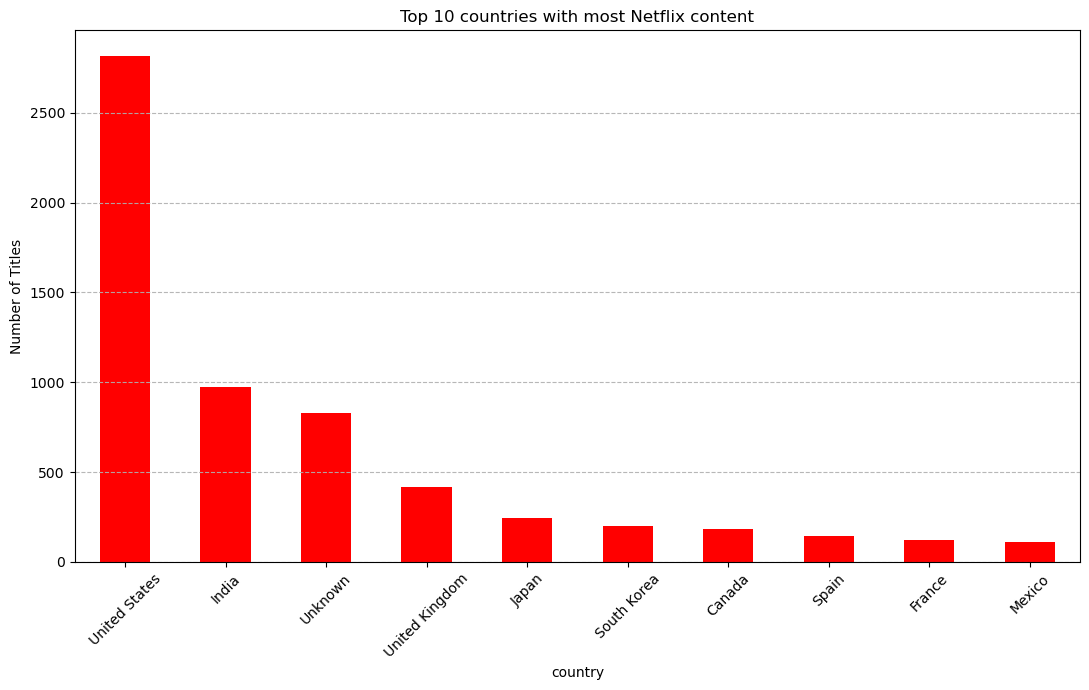

In [22]:
#But First, let's mark the N/A's as Unknown so that it is clear to stakeholders
df['country']= df['country'].fillna('Unknown')
#based on overall count of rows, find out only the top 10 countries
top_countries = df['country'].value_counts().head(10)

#plot them in the graph for intuitive illustration of the findings of the analysis.
plt.figure(figsize=(11,7))
top_countries.plot(kind='bar', color='red')
plt.title('Top 10 countries with most Netflix content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha = 0.9)
plt.tight_layout()
plt.show()


Analysis Question 2 : How has the number of movies released per year changed over the last 20-30 years?

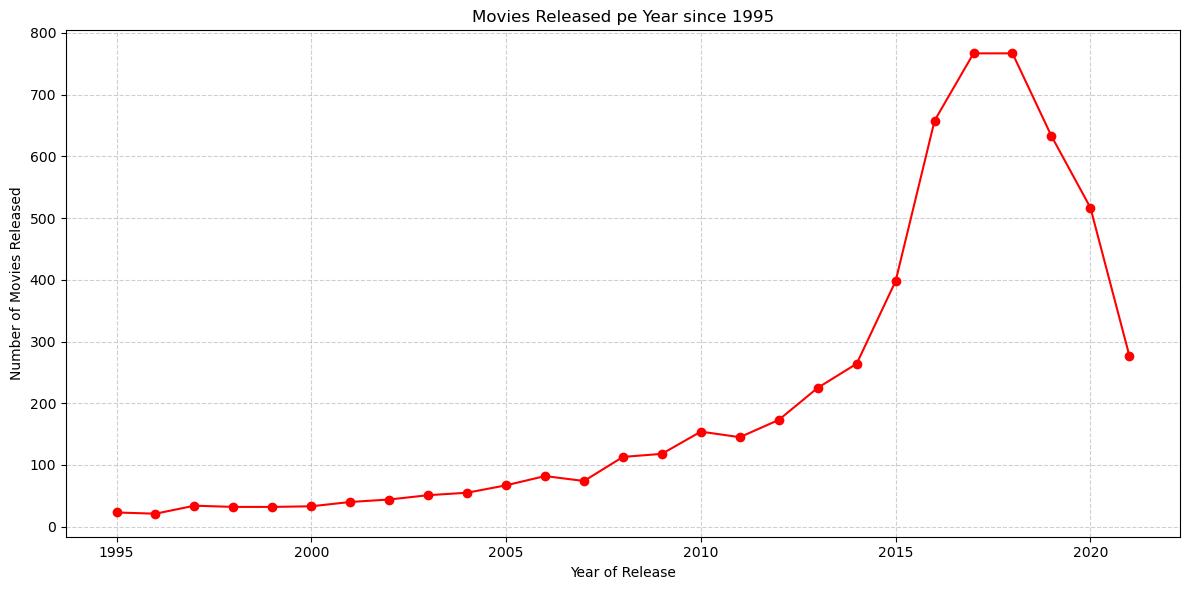

In [27]:
#We plan to create a line graph based on time series, hence coverting the text format into numeric to apply <> conditions
df['release_year']=pd.to_numeric(df['release_year'],errors='coerce')

#We shall do the analysis on only Movies (and not shows,etc.), hence extracting only Movies data in a separate variable
movies = df[df['type']=='Movie']

#Now, we count the number of movies released per year, and a timeframe of last 20-30 years
movies_per_year = movies.groupby('release_year').size()
movies_per_year = movies_per_year[movies_per_year.index >= 1995]

#plot them in the graph for intuitive illustration of the findings of the analysis.
plt.figure(figsize=(12,6))
movies_per_year.plot(kind='line', marker='o', color ='red')
plt.title('Movies Released pe Year since 1995')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.grid(True,linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()



Analysis Question 3 : Comparative Analysis of TV Shows vs Movies available on Netflix

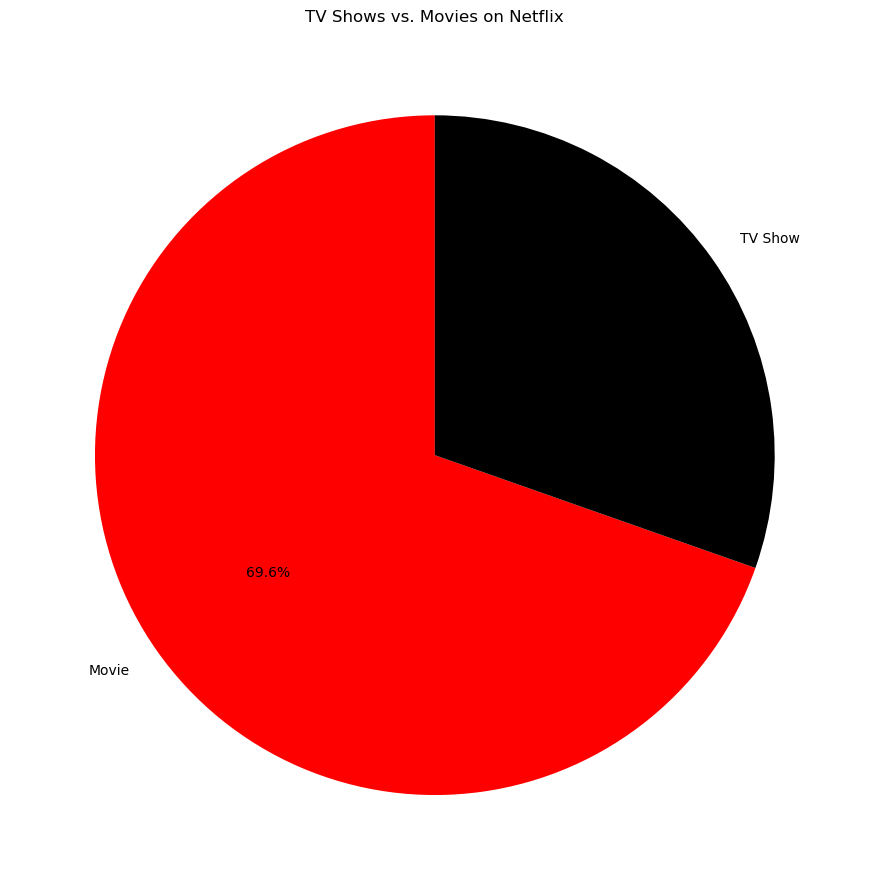

In [32]:
#Counting the TV Shows vs Movies Split in the Netflix dataset
type_counts = df['type'].value_counts()

#The best way to show the split intuitively is via a Pie Chart ! 
plt.figure(figsize=(9,9))
type_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['red','black'])
plt.title('TV Shows vs. Movies on Netflix')
plt.ylabel('')
plt.tight_layout()
plt.show()


Analysis Question 4 : What is the best time to launch a TV show?

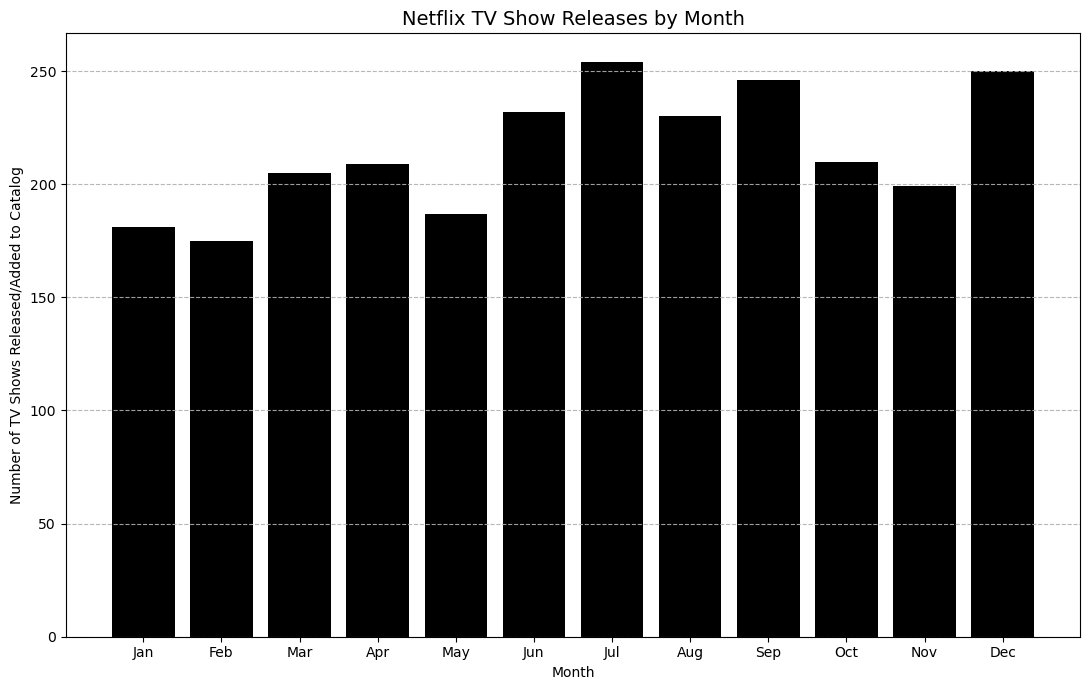

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#Historically, analysing when has Netflix launched it's TV shows (month analysis)
df['date_added']= pd.to_datetime(df['date_added'],errors='coerce')
df['month_added'] = df['date_added'].dt.month

tv_shows = df[df['type']=='TV Show']
tvshows_by_month = tv_shows['month_added'].value_counts().sort_index()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#Plotting the Bar Graph to show which month has been preferred for TV Show releases in the past
plt.figure(figsize=(11,7))
plt.bar(month_names, tvshows_by_month, color ='black')
plt.title('Netflix TV Show Releases by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Released/Added to Catalog')
plt.grid(axis='y',linestyle='--', alpha = 0.9)
plt.tight_layout()
plt.show()


Analysis Question 5 : Analysis of actors/directors of different types of shows/movies

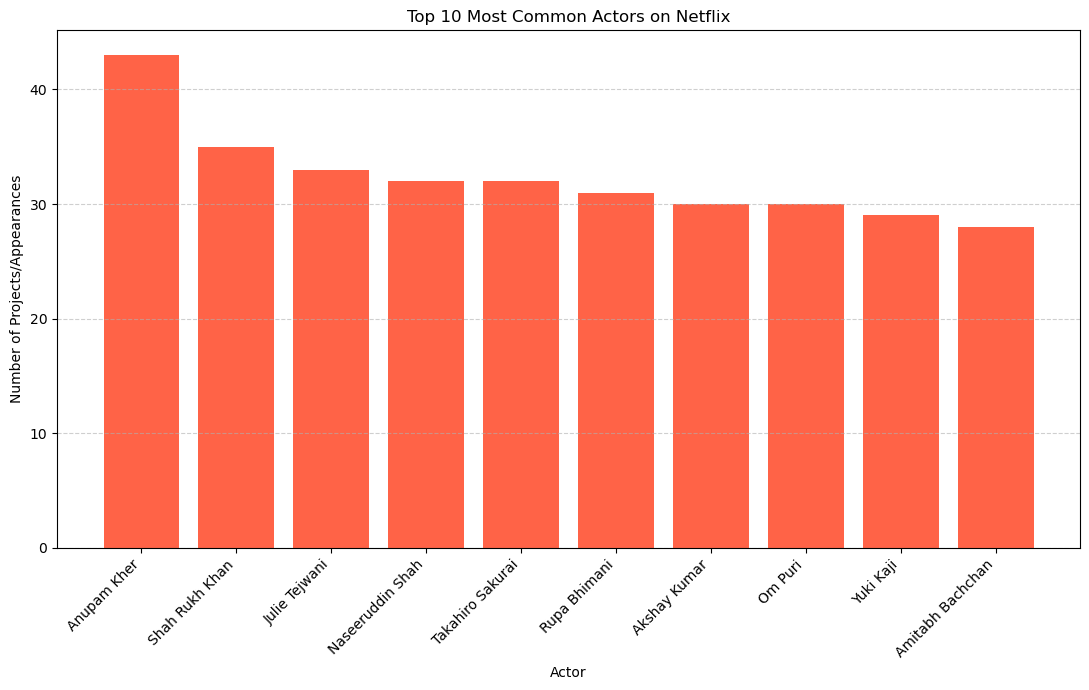

In [40]:
#Analysis of the Cast(Actors) of different movies & tv shows 
df['cast']= df['cast'].fillna('')
actor_counts = Counter(chain.from_iterable([x.split(', ') for x in df['cast'] if x]))
top_actors = dict(actor_counts.most_common(10))


#Plot the Bar graph to show Top 10 Actors with most projects on Netflix 
plt.figure(figsize =(11,7))
plt.bar(top_actors.keys(), top_actors.values(),color ='tomato')
plt.title('Top 10 Most Common Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Projects/Appearances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

Analysis Question 6 : Where has Netflix foscused more in recent years - TV Shows or Movies ?

<Figure size 1200x600 with 0 Axes>

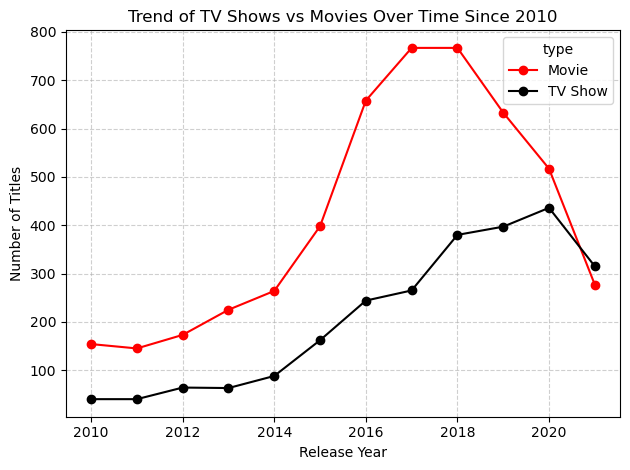

In [47]:
df['release_year'] = pd.to_numeric(df['release_year'],errors='coerce')
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
recent_content = content_by_year[content_by_year.index >= 2010]

#Showing the trend analysis via two line graphs, one for each content type.
plt.figure(figsize=(12,6))
recent_content.plot(kind='line', marker='o',color=['red','black'])
plt.title('Trend of TV Shows vs Movies Over Time Since 2010')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()


Analysis Question 7 : Understanding what content is available in different countries.

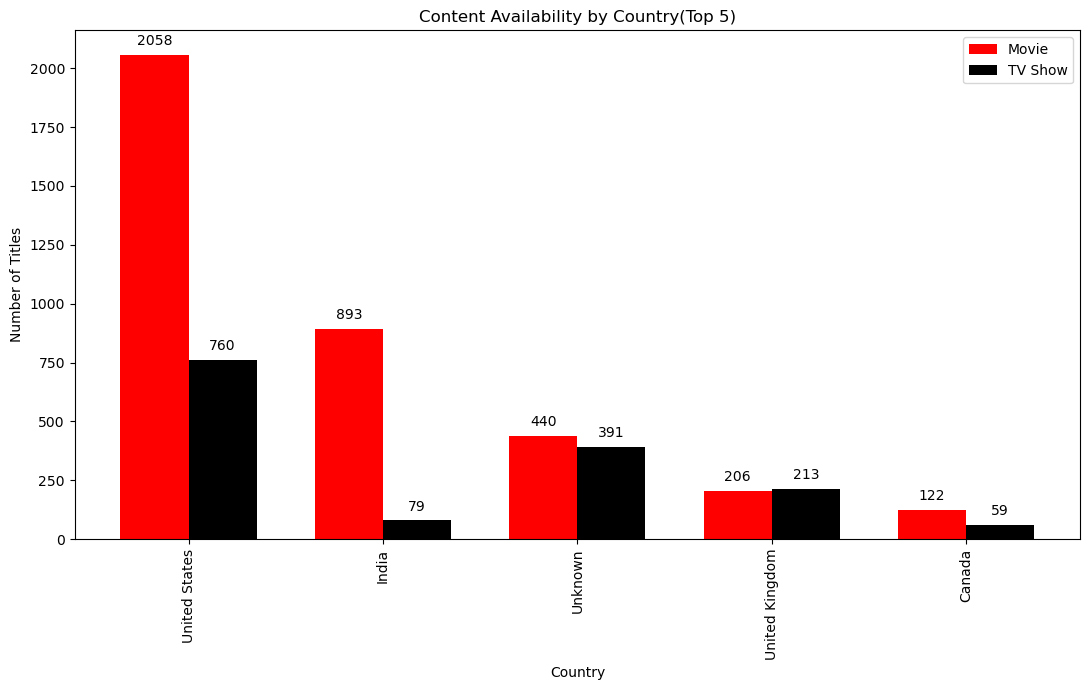

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#fixing the N/As and Blanks in the country column.
df = df[df['country'].notna() & (df['country'].str.strip() != '')]
df = df[~df['country'].str.lower().isin(['Unknown'])]

#removing blank spaces on both ends of the strings
df['country'] = df['country'].str.strip()
df['type'] = df['type'].str.strip().str.title()

#Count the Type of Content by Country ~ group by Country, then Content Type
country_type_counts = df.groupby(['country','type']).size().unstack().fillna(0)

filtered = country_type_counts[(country_type_counts['Movie'] > 0) & (country_type_counts['Tv Show'] > 0)]

top5 = filtered.sort_values(by='Movie', ascending=False).head(5)

#Plotting Grouped Bar Charts - by Country and then by Type within each Country

labels = top5.index.tolist()
movie_counts = top5['Movie'].tolist()
tv_counts = top5['Tv Show'].tolist()

x= np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize= (11,7))
bars1 = ax.bar(x-width/2, movie_counts, width, label='Movie', color='red')
bars2 = ax.bar(x+width/2, tv_counts, width, label='TV Show', color='black')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_title('Content Availability by Country(Top 5)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
ax.bar_label(bars1, padding=5)
ax.bar_label(bars2, padding=5)
plt.tight_layout()
plt.show()



Final Recommendation : 
1. Netflix has been focusing more on Movies as compared to TV Shows in the recent years.
2. The popularity and content availability is concentrated in United States and India, however there is a lot of ground to cover in UK and Canada.
3. More than 70% of the Top 10 Actors with most appearances on Netflix are Indian Actors. Hence, Netflix should continue doing projects with them as they shall bring in a larger share of customer base for enhanced engagement.
4. July, Sept and Dec are the most preferred seasons for launching new releases ~ recommendations are to continue to pattern as they are projected to bring more streaming and views as they coincide with the Summer breaks (July), Fall Break (Sept) and Christmas Holiday (Dec).
5. Missing Data impact detailed analysis for recommendations on new Revenue Stream - Total Views Data, Total Completed Watch Time for the Content and Total no. of Subscriptions for each country is needed for additonal recommendation. 